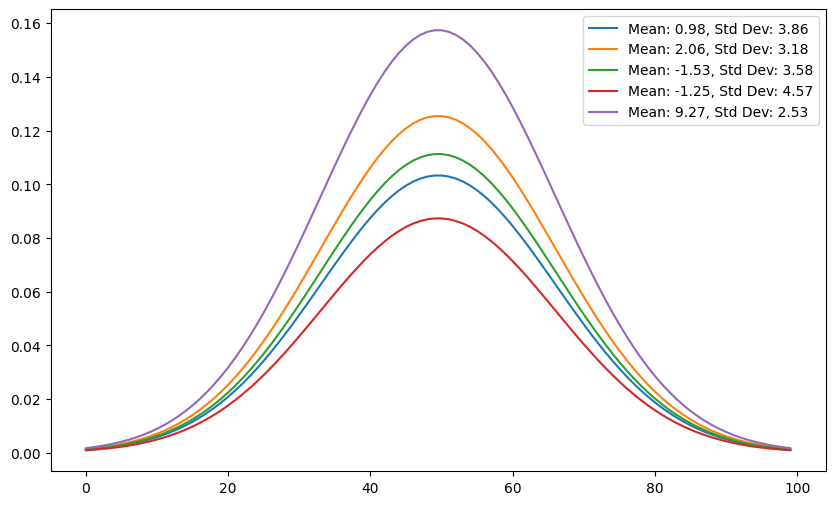

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(0)

# Number of distributions to generate
num_distributions = 1000

# Number of points in each distribution
num_points = 100

# Initialize arrays to store the input features and the outputs
inputs = np.empty((num_distributions, 2))
outputs = np.empty((num_distributions, num_points))

# Generate the data
for i in range(num_distributions):
    
    # Randomly choose a mean and a standard deviation
    mean = np.random.uniform(-10, 10)
    std_dev = np.random.uniform(1, 5)
    
    # Generate the Gaussian distribution
    x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, num_points)
    y = norm.pdf(x, mean, std_dev)
    
    # Store the input features and the output
    inputs[i] = [mean, std_dev]
    outputs[i] = y

# Plot some of the generated distributions
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.plot(outputs[i], label=f'Mean: {inputs[i, 0]:.2f}, Std Dev: {inputs[i, 1]:.2f}')
plt.legend()
plt.show()

In [2]:
from sklearn.model_selection import train_test_split

# Split the data into a training set and a test set
inputs_train, inputs_test, outputs_train, outputs_test = train_test_split(inputs, outputs, test_size=0.2, random_state=0)

# Check the shapes of the arrays
inputs_train.shape, inputs_test.shape, outputs_train.shape, outputs_test.shape

((800, 2), (200, 2), (800, 100), (200, 100))

In [3]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Use a Gaussian kernel for the Gaussian process
kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-3, 1e3))

# Initialize a list to store the models
models = []

# Train a separate model for each point in the distribution
for i in range(num_points):
    
    # Create a new Gaussian process regressor
    gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9, random_state=0)
    
    # Train the model on the training data
    gpr.fit(inputs_train, outputs_train[:, i])
    
    # Store the trained model
    models.append(gpr)

/Users/es5891/Library/Python/3.9/lib/python/site-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/Users/es5891/Library/Python/3.9/lib/python/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/Users/es5891/Library/Python/3.9/lib/python/site-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/prep

KeyboardInterrupt: 

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

# Create a Random Forest regressor
base_estimator = RandomForestRegressor(n_estimators=100, random_state=0)

# Make it a multi-output regressor
model = MultiOutputRegressor(base_estimator)

# Train the model on the training data
model.fit(inputs_train, outputs_train)

MultiOutputRegressor(estimator=RandomForestRegressor(random_state=0))

In [5]:
from sklearn.metrics import mean_squared_error

# Use the model to make predictions on the test set
outputs_pred = model.predict(inputs_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(outputs_test, outputs_pred)

mse

6.687015445635785e-08

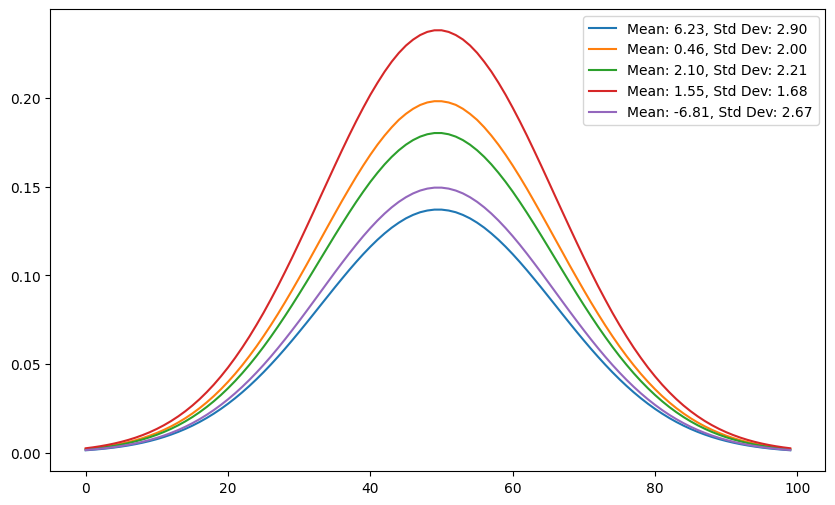

In [6]:
# Generate some new, unseen inputs
new_inputs = np.array([[np.random.uniform(-10, 10), np.random.uniform(1, 5)] for _ in range(5)])

# Use the model to predict the corresponding distributions
new_outputs = model.predict(new_inputs)

# Plot the predicted distributions
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.plot(new_outputs[i], label=f'Mean: {new_inputs[i, 0]:.2f}, Std Dev: {new_inputs[i, 1]:.2f}')
plt.legend()
plt.show()

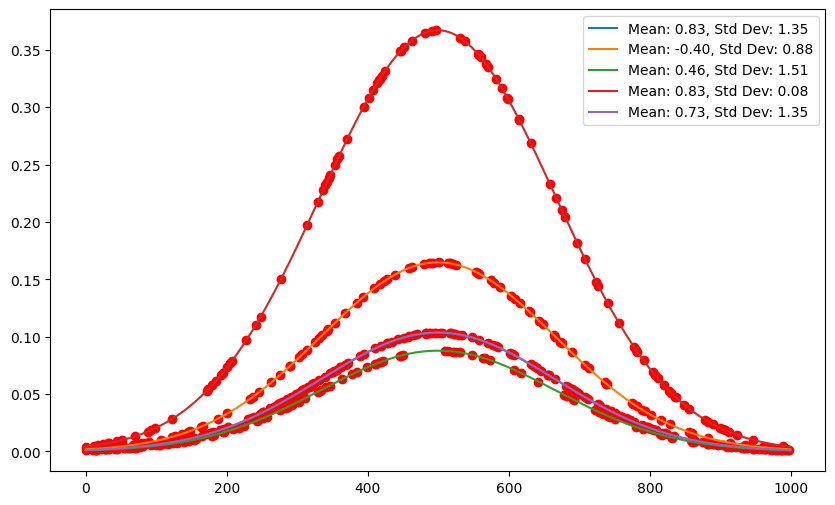

((800, 2), (200, 2), (800, 100), (200, 100))

In [12]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Set a random seed for reproducibility
np.random.seed(0)

# Number of distributions to generate
num_distributions = 1000

# Number of points in each distribution
num_points = 1000

# Number of sampled points per distribution
num_samples = 100

# Initialize arrays to store the input features, the sampled indices and the outputs
inputs = np.empty((num_distributions, 2))
sample_indices_arr = np.empty((num_distributions, num_samples), dtype=int)
outputs = np.empty((num_distributions, num_samples))
full_outputs = np.empty((num_distributions, num_points))

# Generate the data
for i in range(num_distributions):
    
    # Randomly choose a mean and a standard deviation
    mean = np.random.uniform(-10, 10)
    std_dev = np.random.uniform(1, 5)
    
    # Generate the Gaussian distribution
    x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, num_points)
    y = norm.pdf(x, mean, std_dev)

    # Sample points along the distribution
    sample_indices = np.random.choice(num_points, num_samples, replace=False)
    sample_points = y[sample_indices]
    
    # Store the sampled indices
    sample_indices_arr[i] = sample_indices
    
    # Store the input features and the output
    inputs[i] = [np.sin(mean), np.log(std_dev)]
    outputs[i] = sample_points
    full_outputs[i] = y

# Plot some of the generated distributions with the sampled points along the distribution
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.plot(full_outputs[i], label=f'Mean: {inputs[i, 0]:.2f}, Std Dev: {inputs[i, 1]:.2f}')
    plt.scatter(sample_indices_arr[i], outputs[i], color='red')
plt.legend()
plt.show()

# Split the data into a training set and a test set
inputs_train, inputs_test, outputs_train, outputs_test = train_test_split(inputs, outputs, test_size=0.2, random_state=0)

# Check the shapes of the arrays
inputs_train.shape, inputs_test.shape, outputs_train.shape, outputs_test.shape

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error

# Create a Random Forest regressor
base_estimator = RandomForestRegressor(n_estimators=100, random_state=0)

# Make it a multi-output regressor
model = MultiOutputRegressor(base_estimator)

# Train the model on the training data
model.fit(inputs_train, outputs_train)

# Use the model to make predictions on the test set
outputs_pred = model.predict(inputs_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(outputs_test, outputs_pred)

mse

0.005006261885409266

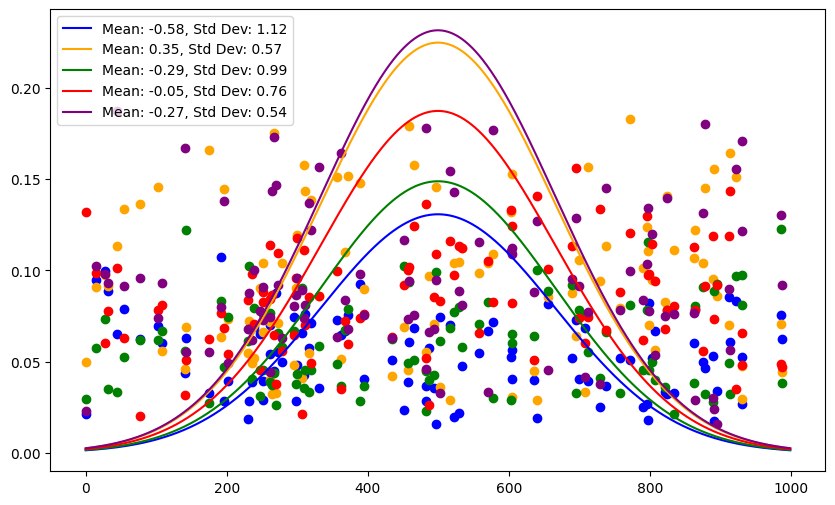

In [14]:
# Generate some new, unseen inputs
new_inputs = np.array([[np.sin(np.random.uniform(-10, 10)), np.log(np.random.uniform(1, 5))] for _ in range(5)])

# Use the model to predict the corresponding points along the distribution curve
new_outputs = model.predict(new_inputs)

# Generate the full distributions for the new inputs
new_full_outputs = np.empty((5, num_points))
for i in range(5):
    mean = np.arcsin(new_inputs[i, 0])
    std_dev = np.exp(new_inputs[i, 1])
    x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, num_points)
    y = norm.pdf(x, mean, std_dev)
    new_full_outputs[i] = y

# Define colors for the plots
colors = ['blue', 'orange', 'green', 'red', 'purple']

# Plot the predicted points along with the full distributions
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.plot(new_full_outputs[i], color=colors[i], label=f'Mean: {new_inputs[i, 0]:.2f}, Std Dev: {new_inputs[i, 1]:.2f}')
    plt.scatter(sample_indices_arr[0], new_outputs[i], color=colors[i])
plt.legend()
plt.show()